In [8]:
%matplotlib inline
import numpy as np
import math 
import matplotlib.pyplot as plt
import axispi as axp
from scipy.interpolate import interp1d
import numpy.random as npr
import pandas as pd


1. Compute the process leading-order cross section, $\sigma(\theta; \sqrt{s})$, as a function of the scattering angle $\theta$ and with the  center of mass energy $\sqrt{s}$ as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s}\gg m_\mu$, which is clearly not the case here ($\sqrt{s}\sim 2m_\mu$);

**The Differential Cross Section**

The differential cross section expresses the probability that an event happens at each possible scattering angle $\theta$.
The differential cross section for the scattering of the $e^+ + e^- \to \mu^+ + \mu^-$, with $\sqrt{s} \sim 2 m_\mu$  in the center-of-mass energy frame is

\begin{equation}
\frac{d\sigma}{d \Omega} =\frac{\alpha^{2}}{4s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left(1+\frac{4}{s}\left(m_{e}^{2}+m_{\mu}^{2}\right)+\left(1-\frac{4 m_{e}^{2}}{s}\right)\left(1-\frac{4 m_{\mu}^{2}}{s}\right) \cos ^{2} \theta\right) 
\end{equation}

The differential cross section can be expressed as,

$$\frac{d\sigma}{d \Omega} = a + b~cos^2(\theta)$$

where,

$$a = \frac{\alpha^{2}}{4s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[1+\frac{4}{s}(m_e^2+m_\mu^2)\right]$$

$$b = \frac{\alpha^{2}}{4s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[\left(1-\frac{4m_\mu^2}{s}\right)\left(1-\frac{4m_e^2}{s}\right)\right]$$
This simplification will be useful in the next tasks.


We can calculate the total cross section where the total energy $$(\sqrt s) = E{tot}$$ is taken as a parameter by integrating this expression.



$$ \sigma (\sqrt s) = \int_0^{\pi} d\theta sin\theta \int_0^{2\pi} d\phi \frac{d\sigma}{d\Omega} =  4\pi\frac{\alpha^2}{3s^3}\left(1-\frac{4m_\mu^2}{s}\right)^{1/2}\left(1-\frac{4m_e^2}{s}\right)^{-1/2}(2m_e^2+s)(2m_\mu^2+s) $$ 
 $\alpha$ is a constant the fine_structure constant. 

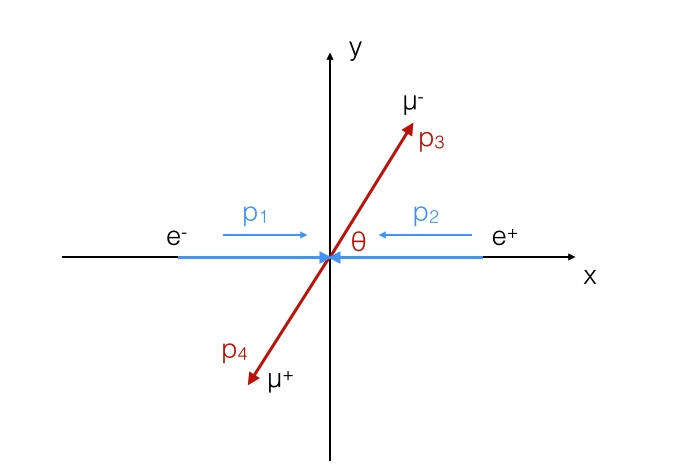

**x needs changed to z**

([<matplotlib.axis.XTick at 0x7fd02084b580>,
 [Text(0.0, 0, '0'),
  Text(0.7853981633974483, 0, '$\\frac{\\pi}{4}$'),
  Text(1.5707963267948966, 0, '$\\frac{\\pi}{2}$'),
  Text(2.356194490192345, 0, '$\\frac{3\\pi}{4}$'),
  Text(3.141592653589793, 0, '$\\pi$')])

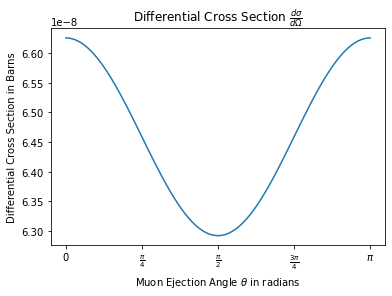

In [9]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import axispi as axp

######################################################## e is never used I don't think
#######Physical Constants################
e = 1.602176634 * 1e-19 #C
m_muon = 105.6583755 #Muon mass [MeV/c^2]
m_e = 0.510998 #Electron mass [MeV/c^2]

mu2 = m_muon**2 #muon's mass squared. In handy in calculations
me2 = m_e**2 #electron's mass squared 

S = 4*mu2 + 5000 #MeV^2
alpha = 0.007297352 # Fine Structure Constant no unit of measurement
#----------------------------------------

#conversion factor
con1 = 2.56819e-3 #MeV−2,  (DCS MeV-2)/con1 = DCS barns

def ab(s):
    #constants to simplify calculation
    ce = 1-(4*me2/s)
    cu = 1-(4*mu2/s)
    c1 = e**4/(64 * np.pi**2 * s)
    c2 = c1 * cu**(1/2) * ce**(-1/2)

    a = c2 * (1+(4/s)*(me2+mu2))
    b = c2 * (1-(4*mu2/s)) * (1-(4*me2/s))
    return a, b

#we will need this later 
def dcs(theta,s):#differential cross section with simplification 
    a,b = ab(s)
    return a+b*np.cos(theta)**2

def d_sigma(s,theta): #differential cross section without simplification
    #print("The differential cross section is", d_sigma)
    d_sigma = (alpha**2/(4*s))*(1-(4*m_muon**2)/s)**0.5*((1-(4*m_e**2)/s))**-0.5*(1+(4/s)*(m_e**2+m_muon**2)+(1-(4*m_e**2)/s)*(1-(4*m_muon**2)/s)*np.cos(theta)**2)
    return d_sigma
def sigma(s):#s - CoM energy squared
    a,b = ab(s)
    return (4*np.pi/3)*(3*a + b)
#def sigma(s):#total cross section
    #print("The total cross section is ", s)
 #   sigma = 4*np.pi*(alpha**2/(3*s**3))*(1-(4*m_muon**2)/s)**0.5*((1-(4*m_e**2)/s))**(-0.5)*(2*m_e**2+s)*(2*m_muon**2+s)
  #  return sigma



##Plotting the differential cross section in CoM
theta = np.linspace(0,np.pi,100)
DCS = [d_sigma(S,th)/con1 for th in theta] #barns



figDCS, ax = plt.subplots()
ax.plot(theta,DCS)
ax.set_title(r'Differential Cross Section $\frac{d\sigma}{d \Omega}$')
ax.set_xlabel(r'Muon Ejection Angle $\theta$ in radians')
ax.set_ylabel('Differential Cross Section in Barns')
xlables = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)

2. Compute and display the angle and momentum components distributions of the emerging muon pairs;

$$\int^{4\pi~sr}_{0}\frac{d\sigma}{d \Omega} d\Omega = \sigma $$

$$\int^{4\pi~sr}_{0}\frac{1}{\sigma}\frac{d\sigma}{d \Omega} d\Omega = 1 $$

The probability density function of ejected muons having a solid angle $\Omega$ is then,

$$\mathbb{P}(\Omega) = \frac{1}{\sigma}\frac{d\sigma}{d \Omega}$$

To find the probability density function in terms of theta we can integrate over phi.

$$\mathbb{P}(\Omega) = \int^{2\pi}_{0} \frac{1}{\sigma}\frac{d\sigma}{d \Omega} \sin\theta~d\phi$$

$$\mathbb{P}(\theta) = \frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}$$
 
The aim is to sample random numbers (ejection angles, $\theta$) from this probability density function.


In [10]:
#probability density function, PDF of ejection angles
def pdf(theta,s):#theta - ejection angle #s - CoM energy squared
    a,b = ab(s)
    sig = sigma(s)
    DCS = d_sigma(s,theta)
    return (2*np.pi*np.sin(theta)/sig)*DCS



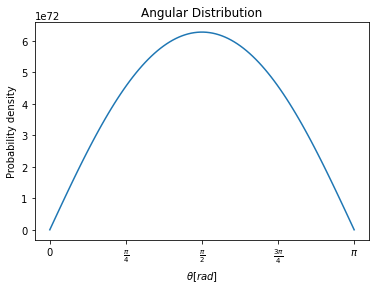

In [11]:
plt.plot(theta, pdf(theta,S))
plt.title("Angular Distribution")
plt.xlabel(r'$\theta[rad]$' )
plt.ylabel(r'Probability density' )
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)
plt.show()


4. Write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically;

The goal of this section is to sample muon ejection angles from a probability density function that matches the physics of the interaction. The PDF required is the normalised probability density function which we did in the previous section. The inverse transmorm method is then used to sample angles from this PDF.

**Inverse Transform Sampling**

The sampling method used is known as Inverse Transmorm Sampling. The goal of this method is to take a random number generated from the uniform probability density function $U$ and pass it into a function, $F(U)$, that returns a sample of our generated dataset $X$. In this case our generated dataset is made of ejection angles. 

$$F(U) = X$$


This function we seek can be shown to be the inverse of the cumulitive density function, CDF, of our probability density function. The CDF is the probability of sampling an event with a value less than $x$.

To prove $CDF^{-1}(U)$ is indeed the function $F(U)$ we use probability notation. 

The CDF is defined as,

$$CDF(x) = \mathbb{P}(X\leq~x).$$ 

If we sub in $F(U) = X$ from before then we get,

$$CDF(x) = \mathbb{P}(F(U)\leq~x).$$ 

If we apply the inverse function $F^{-1}(U)$ to both sides of the inequality then we arrive at,

$$CDF(x) = \mathbb{P}(U \leq~F^{-1}(x)).$$ 

This expresses the probability that a value sampled from the uniform distrubution is less than $F^-1(x).$ The uniform distribution is such that the probability of sampling less than a vaue is equal to that value. As can be seen in the uniform distribution below. The probability of sampling an $U < 0.8$ is the area of the blue section before the red line. This is 0.8 of the total area. Therfore $\mathbb{P}(U < 0.8) = 0.8$ and more generally $\mathbb{P}(U < u) = u$.

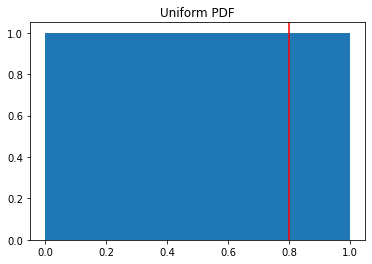

This argument show's that, 

$$CDF(x) = \mathbb{P}(U\leq~F^{-1}(x)) = F^{-1}(x).$$ 

$$CDF(x) = F^{-1}(x).$$

These functions are the inverse of eachother. This means that, $F(x) = CDF{^-1}(x)$. This is true for any value of x. We can sub in the sample from our uniform distribution U and we get. 

$$F(U) = CDF^{-1}(U)$$

$F(U)$ was origionaly defined as a function that will produce our desired dataset X when U is a uniformly distributed random number from 0 to 1. It has now been shown that the inverse of the CDF meets these requirements. Therefore the inverse CDF can be used to sample angles from the normalised differential cross section.

**Finding the Inverse CDF**

The PDF for the muon ejection angle that matches the physics of the interaction is, 

$$\mathbb{P}(\theta) = \frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}$$

The CDF is defined as the integral, 

$$CDF(\theta) = \int^{\theta}_{0}\frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}~d\theta = \int^{\theta}_{0}\frac{2\pi\sin\theta}{\sigma}[a + b~cos^2(\theta)]~d\theta = \frac{2\pi}{\sigma}\left[-\frac{\cos\theta}{3}(3a+b~\cos^2\theta)\right].$$ 

The inverse of this function cannot be found analyticaly. Instead a look up tabel is generated. For many $\theta$ values the value of CDF is calculated and the two values are associated with eachother. The inverse function of finding the CDF from a particular $\theta$ can then be found by looking for the value in the tabel. There is an issue if we want to know the CDF for a theta value we have not calculated. In this case we use linear iterpolation. This simply means we assume the path between two calculated vaues is linear so we can guess any value inbetween. 

SciPy has a function for interpolation called interpl1d and this will be used to create our approximate inverse function.

([<matplotlib.axis.XTick at 0x7fd020321790>,
 [Text(0.0, 0, '0'),
  Text(0.7853981633974483, 0, '$\\frac{\\pi}{4}$'),
  Text(1.5707963267948966, 0, '$\\frac{\\pi}{2}$'),
  Text(2.356194490192345, 0, '$\\frac{3\\pi}{4}$'),
  Text(3.141592653589793, 0, '$\\pi$')])

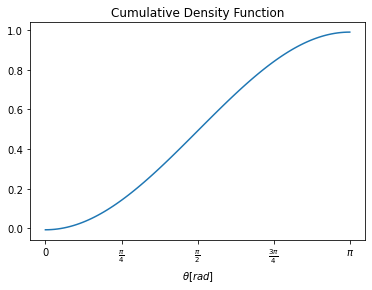

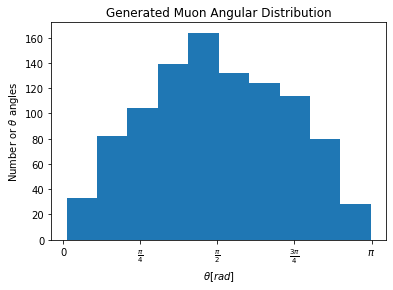

In [12]:
#Cumulitive Density Function. Probability a THETA sampled is less than theta in the function.
def cdf(theta,s):
    a,b = ab(s)
    sig = sigma(s)
    return (2*np.pi/sig)*((-np.cos(theta)*(3*a+b*np.cos(theta)**2)*1/3)+ a)

#Theta Generation, Sampling from the PDF, Using Inverse CDF Method
def thetaGen2(howMany,s):#howMany - the number of thetas to generate
    #generate the lookup table for the inverse function
    theta = np.linspace(0,np.pi,100)
    CDF = [cdf(x,s) for x in theta]
    PDF = [pdf(x,s) for x in theta]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
    thetaPredictor = interp1d(CDF, theta, kind = "linear")
    return [float(thetaPredictor(x)) for x in npr.uniform(min(CDF),max(CDF),howMany)]

CDF = [cdf(x,S) for x in theta]

figCDF = plt.figure()
plt.plot(theta,CDF)
plt.title('Cumulative Density Function')
plt.xlabel(r'$\theta[rad]$')
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)

figThetaGen = plt.figure()
plt.hist(thetaGen2(1000,S))
plt.title('Generated Muon Angular Distribution')
plt.xlabel(r'$\theta[rad]$')
plt.ylabel(r'Number or $\theta$ angles')
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)

3. Boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has energy high enough to give rise to the process.

Muon pair production will only occur if the center of mass energy has enough energy to account for two muons i.e it meets the condition that $\sqrt{s} \geq 2m_\mu $. 

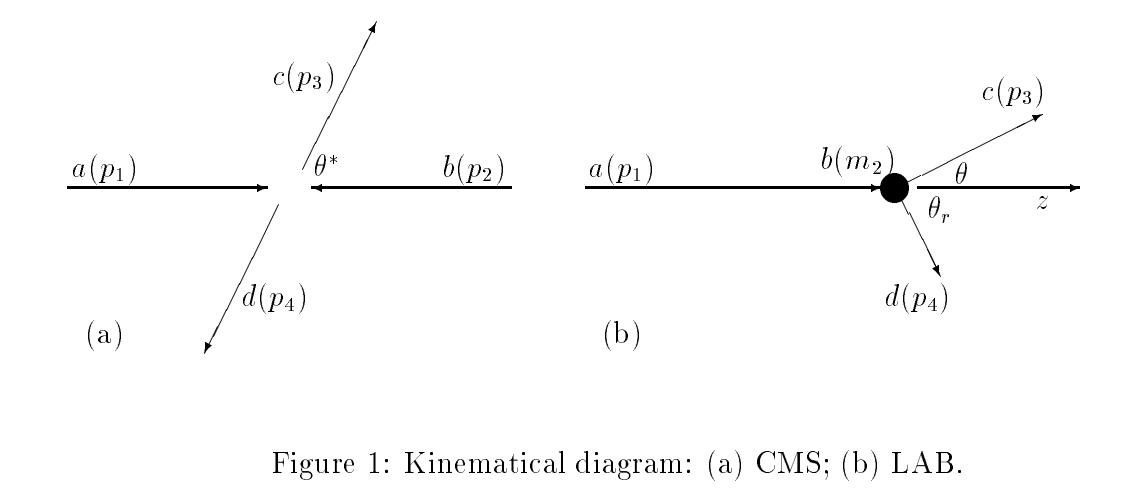

<div>
    <center>
        <img src="attachment:image.png" width="80%" st>
    </center>
</div> 

---
 ### Center of mass frame

The centre of mass frame is defined such that the sum of the momentum must be zero. This is true for the incoming particles and therefore has to be true for the outgoing.

$$0=\sum_{i}{\vec{p}_{i}}$$

$$\vec{p}_{e^+}=-\vec{p}_{e^-}$$


$$p_{e^+}=\left(E_{e^+}, \vec{p}_{e^+}\right), \quad p_{e^-}=\left(E_{e^-}, \vec{p}_{e^-}\right), \quad $$
Adding these momentum in the matrix addition$s$ the opposite momentum cancel
$$s=\left(p_{e^+}+p_{e^-}\right)^{2}=\left(E_{e^+}+E_{e^-}, 0\right)^{2}=4 E^{2}$$


$$E=E_{e^+}=E_{e^-} \therefore \sqrt{s}=2 E$$

The energy available to the muon pair must be half of the center of mass energy. Note for convenicence  $m_\mu$ used here is the muon rest mass.  

$$E_\mu= \frac{s}{2} =\sqrt{p_\mu^{2} +m_{\mu}^{2}} \therefore |p_\mu| =\sqrt{\frac{s}{4} -m_\mu^2} $$ 


 ### Lab frame


Lab frame: is the frame that contains a particle at rest, in this experiment this is the stationary electron in the beryllium target. Note in this project system is defined such that the positron beam travels in  $z$.

$$p_{e^+}=\left(\begin{array}{c}
E  \\
0 \\
0 \\
p_z
\end{array}\right), \phantom{fillll}   p_{e^-}=\left(\begin{array}{c}
m_{e}
\\
0 \\
0 \\
0
\end{array}\right)$$

$$
p_{e^+} + p_{e^-}=\left(\begin{array}{c}
E+m_{e} \\
0\\
0 \\
p_z
\end{array}\right)$$

$$
s=(p_{e^+} + p_{e^-})^2= E^2 +2m_{e}E+ m_e^2 - p_z^2 $$

Remebering that  
 $$E^2 = p^2+m^2 \therefore p^2 = E^2-m^2$$
 Gives  
 $$s=2m_eE+2m_e^2 \approx 2m_eE$$


### Transforming between frames

We can obtain the Lorentz boost factor $\gamma$ by comparing the positron beam energy $E_{L A B}$ with the total centre of mass energy $\sqrt s$  through the following relation.

$$\gamma_{c m}=\left(E_{L A B}+m_{2}\right) / \sqrt{s}$$

In a simlar fashion  

$$v_{c m}=p_{L A B} /\left(E_{L A B}+m_{2}\right)$$

The center of mass frame is moving away from the lab frame in the $z$ axis with $v_z$ the change in $p_z$ can be calculated using standard momentum boost formulas as follows.

\begin{align} p'_z &= \gamma (p_z - E v/c^2) \end{align}
\begin{align} p_z &= \gamma (p_z' + E' v/c^2) \end{align}

The boosted energy can be derived from the relation $E^2 = p^2+m^2$ where in this formula $p$ is the 3 momentum  
<sub>**Diagrams and a useful sources for some of the mathematics 
https://web.physics.utah.edu/~jui/5110/hw/kin_rel.pdf}</sub>


In [13]:
E_additional = 50 #MeV 
root_s =  2*m_muon  
s = root_s**2

#Magnitudes from collision analysis canfound just from s and mass of the particle
def p_com(s, m):
    return np.sqrt((s-(2*m)**2)/4)
def p_lab(s, m):
    return (1/(2*m))*np.sqrt(s*(s-(2*m)**2))
def E_lab(s,m): #E 
    return (s - 2*m**2)/(2*m)  
def E_com(s,m):
    E_l=E_lab(s,m)
    return (m**2+m*E_l)/np.sqrt(s)  

#Boot formulas
def gamma_f_E(E_l, m,s):# gamma from energy, E_l is E_lab in function 
    return (E_l+m)/np.sqrt(s)
def beta_f_gamma(gamma):
    return 1 - 1/(gamma**2)
def boost_p(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(p-E*frame_v) 
def inv_boost_p(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(p+E*frame_v)
def boost_E(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(E - frame_v*p) 
def inv_boost_E(gamma, frame_v, E, p):#This one is for everything from the other frame
    return gamma*(E+ frame_v*p)
def v_frame_com(p, E, m):
    return p/(E +m)

p_com_e = p_com(s,m_e)
p_com_mu = p_com(s,m_muon)
E_com_e = E_com(s,m_e)
E_com_mu = E_com(s,m_muon)

p_lab_e = p_lab(s,m_e)
p_lab_mu = p_lab(s,m_muon)
E_lab_e = E_lab(s,m_e) 
E_lab_mu = E_lab(s,m_muon)

print('root s', root_s)
print('Com ------------------')
print(' p_e =', p_com_e)
print(' E_e =',E_com_e)
print(' p_mu =', p_com_mu)
print(' E_mu =', E_com_mu)

print('Lab ------------------')
print(' p_e =', p_lab_e)
print(' E Positron /beam energy =', E_lab_e)
print(' p_mu =', p_lab_mu)
print(' E_mu =', E_lab_mu)

test = p_lab_e*m_e/root_s #expected result that p*=p_lab* m_2/(sqrt2) verified

print('Boosts ------------------')
v_com = v_frame_com(p_lab_e, E_lab_e, m_e)
print(' v com frame = ',v_com)

gamma = gamma_f_E(E_lab_e, m_e, s)
print(' gamma = ', gamma)
print('positron boost to com')
print(' p_lab_e', p_lab_e)
p_boost = boost_p(gamma,v_com, E_lab_e, p_lab_e)
print(' p_boost  = ', p_boost)
E_boost = boost_E(gamma, v_com, E_lab_e, p_lab_e)
print(' E_boost = ', E_boost)
print('boost back to lab')
p_back = inv_boost_p(gamma, v_com, E_com_e, p_com_e) #Test to see if we can get back to start
E_back = inv_boost_E(gamma, v_com, E_com_e, p_com_e)
print(' p_lab_back', p_back)
print(' E_lab_back', E_back)

root s 211.316751
Com ------------------
 p_e = 105.65713981716047
 E_e = 105.6583755
 p_mu = 0.0
 E_mu = 105.6583755
Lab ------------------
 p_e = 43693.17200089841
 E Positron /beam energy = 43693.17200388651
 p_mu = 0.0
 E_mu = 105.6583755
Boosts ------------------
 v com frame =  0.9999883049229777
 gamma =  206.7686673920446
positron boost to com
 p_lab_e 43693.17200089841
 p_boost  =  105.65713981569245
 E_boost =  105.65837549957115
boost back to lab
 p_lab_back 43693.17200089841
 E_lab_back 43693.17200388651


Here it was verified the boosts achieve known positron beam threshold energy of 43693 $MeV$ (43.7 $GeV$) in the lab frame of when $\sqrt{s} = 2 m_{\mu}$.    

5. produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);

In the centre of mass frame, the momentum of the produced muon can be calculated from the norm of the momentum and the angles $\theta^*$ and $\phi^*$. Since that there is no preferred direction of  $\phi^*$ in this monte carlo simulation $\phi^*$ is pulled from a uniform random distribution between $0$ and $2\pi$ for each muon pair. The angle of $\theta*$ is taken from the previously calculated distribution.


$$
p^{*}=\left(\begin{array}{c}
E / c \\
p_{x} \\
p_{y} \\
p_{z}
\end{array}\right)=\left(\begin{array}{c}
\sqrt{S} / 2 \\
p_{\mu} \sin \theta^{*} \sin \phi^{*} \\
p_{\mu} \sin \theta^{*} \cos \phi^{*} \\
p_{\mu} \cos \theta^{*}
\end{array}\right)
$$

where $p_{\mu}=\sqrt{S / 4-m_{\mu}^{2}}$.

The produced muon coordinates are then boosted to the labratory.

In [14]:
import numpy.random as npr
def p_muon_com(theta, phi,s): # initalise the input muon
    E_muon = E_lab(s, m_muon)#even energy split
    p_mag = p_com(s, m_muon)
    p_x = p_mag * np.sin(theta)*np.sin(phi) 
    p_y =  p_mag * np.sin(theta)*np.cos(phi)
    p_z =  p_mag * np.cos(phi)
    
    return E_muon, p_x, p_y, p_z 

def p_muon_boost(muon, s): # initalise the input muon
    p_mag = p_com(s, m_muon)
    E_com = E_lab(s, m_e)
    gamma = gamma_f_E(E_com, m_e, s)
    
    #print('g', gamma)# checked
    v_com = v_frame_com(p_mag, E_com, m_e)
    pz = inv_boost_p(gamma, v_com, muon[0], muon[3])
    E_boost = np.sqrt(muon[1]**2 + muon[1]**2+pz**2+m_muon**2) #E^2=p^2+m^2

    return E_boost, muon[1], muon[2], pz
    
def p_mag_(mu):
    return np.sqrt(mu[1]**2+mu[2]**2+mu[3]**2)

def momenta_data(mu1, mu2):
    return mu1[1], mu1[2],mu1[3], mu2[1], mu2[2],mu2[3]

def mc(s,N):
    prob = np.random.rand(N)
    theta = np.array(thetaGen2(N,s))
    phi =   np.random.uniform(0, 2*np.pi, N)
    
    muon_cm = p_muon_com(theta, phi, s)
    muon_lab = p_muon_boost(muon_cm, s)
        
    muon_cm2 = p_muon_com(theta-np.pi,phi, s)
    muon_lab2 = p_muon_boost(muon_cm2,s)
    
    momenta = np.array(momenta_data(muon_lab, muon_lab2)).T
    df =pd.DataFrame(momenta, columns = ['$p^{\mu}_{1x}$', '$p^{\mu}_{1y}$','$p^{\mu}_{1z}$','$p^{\mu}_{2x}$', '$p^{\mu}_{2y}$','$p^{\mu}_{2z}$'])
    return df

E_additional = 50 #MeV 
root_s =  2*m_muon  + E_additional
s = root_s**2

df=mc(s,10**6)
df

,$p^{\mu}_{1x}$,$p^{\mu}_{1y}$,$p^{\mu}_{1z}$,$p^{\mu}_{2x}$,$p^{\mu}_{2y}$,$p^{\mu}_{2z}$
0,71.084441,-14.291664,-3809.842768,-71.084441,14.291664,-3809.842768
1,-59.630938,48.024733,12391.303116,59.630938,-48.024733,12391.303116
2,-0.960277,0.831955,12932.995157,0.960277,-0.831955,12932.995157
3,-3.556497,57.711335,19680.050967,3.556497,-57.711335,19680.050967
4,69.520958,18.028415,4997.348686,-69.520958,-18.028415,4997.348686
...,...,...,...,...,...,...
999995,74.460766,-11.301761,-2885.254820,-74.460766,11.301761,-2885.254820
999996,3.594886,25.361345,19522.751977,-3.594886,-25.361345,19522.751977
999997,-19.377609,-43.424972,-17883.507584,19.377609,43.424972,-17883.507584
999998,49.012438,-21.917869,-7959.097648,-49.012438,21.917869,-7959.097648


Plotting the count numbers of the histogram  

Text(0.5, 1.0, '$\\mu_1$ lab frame $P_z$ Histogram ($N=10^6$)')

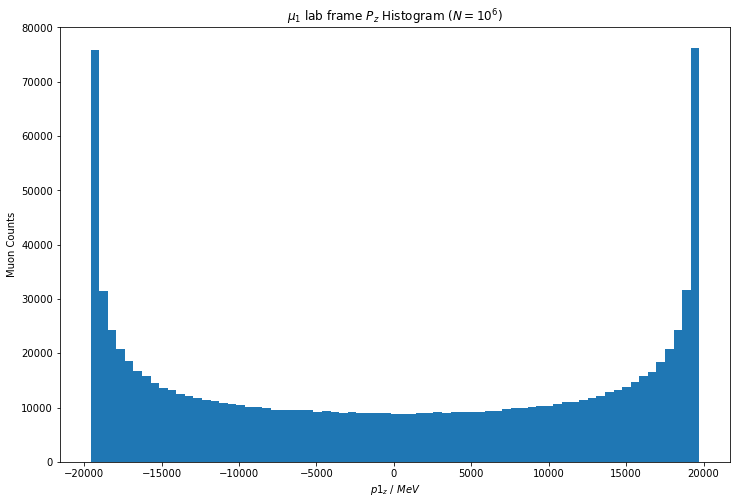

In [7]:
p1_z= df['$p^{\mu}_{1z}$']
plt.figure(figsize=(12,8))
plt.hist(p1_z, bins='auto')
plt.xlabel("$p1_z$ / $MeV$ ")
plt.ylabel("Muon Counts")
plt.title('$\mu_1$ lab frame $P_z$ Histogram ($N=10^6$)')

6. Assume a  3  cm thick Beryllium block is used as target and a rate of positron on target of  $10^6$  Hz. Compute the rescaling factor (weight) you need to apply to the  𝑁  simulated events such that they represent the statistics that would be gathered in a week of countinuous operations;

Given $N$ generated events, we can calculate the correct statistics for an experiment lasting one week just by applying to the simulated events a rescaling factor ($C$).

The number of $(\mu^+ \mu^-)$ pairs produced per positron bunch on target is:

$$n(\mu^+ \mu^-)=n^+ \rho_{e^-} l_{Be}\, \sigma(\mu^+ \mu^-).$$

where $n^+$  is the number of positrons in the bunch, $\rho_{e^-}$ is the electron density in the medium, $l_{Be}$ is the thickness of the target, $\sigma(\mu^+ \mu^-)$ is the muon pairs production cross-section, as we have shown before it depends on the scattering angle $\theta$ and with center of mass energy $\sqrt s$ as a parameter.
The electron density in the medium can be computed as:

$$ \rho_{e^-} = N_A \frac{\rho_{\mathrm{Be}}}{M} Z $$

with $N_A$ being Avogadro constant, $\rho_{\mathrm{Be}}$ is the target density (Beryllium), $Z$ is its atomic number, $M$ is its molar mass.

We can rewrite the first formula as a function of the rate of positrons on the target $\lambda_{e^+}$, thus we get:

$$f(\mu^+ \mu^-)=\lambda_{e^+} \rho_{e^-} l_{Be}\, \sigma(\mu^+ \mu^-).$$

Then the rescaling factor is given by:

$$C=\frac{f(\mu^+ \mu^-) \Delta T}{N}.$$



The center of mass energy $\sqrt{s}$ can be found using the beam energy in the lab frame and the mass of beam and target particles, which are both $m_e$ in this case.

$$s = 2m_e^2+2m_e~E_{LAB}$$ 

The $E_{LAB}$ used is the minimum beam energy energy calculated in section 8 when considering the thickness of the target.

$$E_{LAB} = 47571.03~MeV$$

Equation taken from https://web.physics.utah.edu/~jui/5110/hw/kin_rel.pdf

In [20]:
lBe = 3                  #Beryllium target thickness [cm]
lmbd = 1e+6              #rate of positron on target [Hz]
time = 60*60*24*7        #seconds in a week [s]
Na = 6.0221409e+23       #Avogadro constant [mol^-1]
dBe = 1.85               #Beryllium density [g/cm^3]
ZBe = 4                  #Beryllium atomic number
MBe = 9.0121820          #Berylium molar mass [g/mol]
E_lab = 47571.03165490111#[MeV]
sq_root_s = 2*m_muon     #center of mass energy [MeV/c^2]

s = 2*m_e**2+2*m_e*E_lab #calculated from beam energy required to penetrate 3cm
print('The s channel value is equal to', s, "MeV")

d_el = Na * dBe * ZBe / MBe     #Beryllium electron density [number of electron/cm^-3]
#1barn=1e-24 cm^2 #1MeV^-2=389.379barn
Sigma = sigma(s)*(1e-24)* 389.379 #muons pair production cross section [cm^2]
print('Total cross section',Sigma, ' cm^2')
f_mu = lmbd * d_el * lBe * Sigma  #rate of produced muon pairs [Hz]
C = f_mu * time                 #scaling factor

print("Muon pairs produced in a week:", C)

# apply the scale factor to the N events in order to
# represent the statistics that would be gathered in a
# week of continuous operations


N=1e+5
weight = C/N  #weight factor
df = weight * df
df 


The s channel value is equal to 48617.92630509432 MeV


TypeError: 'float' object is not callable

We have already chosen the positron energy so that the reaction occurs close to the threshold (assuming the electrons in the Beryllium target at rest) which means the center of mass energy $\sqrt {s}$ should be
$$\sqrt {s} \sim 2m_\mu ,$$ 
in order to have the muon pairs production along the entire length of the target.
We chose so at the beginning to minimize the divergence of the resulting "muon beam".

Addition of four momenta in case of particles with relativistic momenta:
$$p_{e^+}=\begin{pmatrix} E_{e_+} \\ p_{x} \\ 0 \\ 0 \end{pmatrix}, \ \ \ \  p_{e^-}=\begin{pmatrix} E_{e_-} \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

It is possible to compute the Mandelstam variable $s$ with the target electron at rest (no momentum) in the laboratory frame:
$$ s=(p_{e^+} + p_{e^-})^2 =$$ $$E_{e_+}^2 + E_{e_-}^2+2E_{e_+}E_{e_-}-\vec p_{e_+}^2 =$$ $$ E_{e_+}^2 + m_{e}^2+2E_{e_+}m_{e}-\vec p_{e_+}^2,$$ 
remembering that $E^2=p^2+m^2$, then the previous is equal to:
$$\vec p_{e_+}^2+m_{e}^2+m_{e}^2+2E_{e_+}m_{e}-\vec p_{e_+}^2 = 2E_{e_+}m_{e}+2m_{e}$$
With respect to the initial condition:
$$2E_{e_+}m_{e}+2m_{e}>4m_\mu^2.$$
So the positron energy has to be:
$$E_{e_+}>\frac{4m_{\mu}^2-2m_{e}^2}{2m_{e}}.$$
Now we can compute the energy lost traversing the target, if we assume $z$ is the longitudianl coordinate parallel to the beam direction, with $X_{0}$ as the Beryllium radiation length ($=35.28cm$):
$$E(z)=E_{0}e^{-\frac{z}{X_{0}}}.$$

If the target length considered is $l=3 cm$ (as in point 6) then the nominal beam energy $E_0$ has to be:
$$E_0>E_{e_+}e^{\frac{l}{X_{0}}}.$$


Threshold energy condition(MeV): 43693.17200388651
Nominal beam energy required for the treshold reaction to happen(MeV): 47571.12009661152


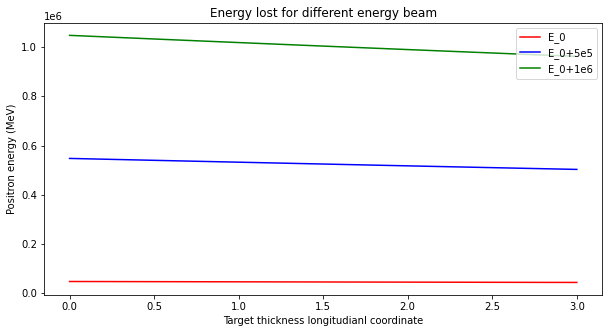

In [18]:
rad_length = 35.28   #radiation length of Beryllium [cm]
l = [3,100]                #Beryllium target thickness [cm]

E_p = ((4*m_muon**2 - 2*m_e**2)/(2*m_e))
print("Threshold energy condition(MeV):",E_p)
E_0 = E_p*np.exp(l[0]/rad_length) #minimum
print("Nominal beam energy required for the treshold reaction to happen(MeV):",E_0)



def E_z(x,E0):
    return E0*np.exp(-x/rad_length)
  
x = np.linspace(0, l[0])

E_z1 = [E_z(xi,E_0) for xi in x]
E_z2 = [E_z(xi,E_0+500000) for xi in x]
E_z3 = [E_z(xi,E_0+1000000) for xi in x]
fig = plt.figure(figsize=(10,5))
plt.plot(x,E_z1,label="E_0",color='red')
plt.plot(x,E_z2,label="E_0+5e5",color='blue')
plt.plot(x,E_z3,label="E_0+1e6",color='green')
plt.title("Energy lost for different energy beam")
plt.xlabel("Target thickness longitudianl coordinate")
plt.ylabel("Positron energy (MeV)")
plt.legend()

plt.show()


9. We can take into account the energy loss along the target lenght of the former point, which means that the muons pair-production probability varies with the cross section along the target.

References:

Electron-positron anhilation into muon-antimuon pairs http://www.physics.usu.edu/Wheeler/QFT/PicsII/QFT10Feb23Muon.pdf

Kazakov, L.I. Laminar Flow of a Viscous Liquid in the Entrance Region of a Circular Pipe. Fluid Dyn 56, 954–966 (2021). https://doi.org/10.1134/S0015462821070053

fluid flow in a pipe

$R$ = pipe radious or beam radious<br>
$V_{0}$ = Velocity at the center of the pipe or beam<br>
$V(r)$ = the velocity of the pipe or beam at radious r

$$V(r) = V_{0}\left(1-\frac{r^2}{R^2}\right)$$

Production of the Smallest QED Atom: True Muonium $(\mu^+ \mu^-)$ https://arxiv.org/abs/0904.2225

Muon production and accumulation from positrons on target https://journals.aps.org/prab/pdf/10.1103/PhysRevAccelBeams.23.051001 ,
https://link.springer.com/article/10.1134/S0015462821070053<br>
Beryllium radiation length https://pdg.lbl.gov/2021/AtomicNuclearProperties/HTML/beryllium_Be.html
